<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/Part_2_09_Custom_Model_ResidualRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Step 1: Load and preprocess data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Step 2: Define Residual Block
class ResidualBlock(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.dense1 = layers.Dense(units, activation='relu')
        self.dense2 = layers.Dense(units)
        self.activation = layers.Activation('relu')
        self.shortcut = layers.Dense(units)  # Ensures matching dims if needed

    def call(self, inputs):
        shortcut = self.shortcut(inputs)
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.activation(x + shortcut)

In [6]:
# Step 3: Define Custom Subclassed Model
class ResidualRegressor(keras.Model):
    def __init__(self):
        super().__init__()
        self.block1 = ResidualBlock(64)
        self.block2 = ResidualBlock(64)
        self.output_layer = layers.Dense(1)

    def call(self, inputs):
        x = self.block1(inputs)
        x = self.block2(x)
        return self.output_layer(x)

In [7]:
# Step 4: Compile and Train
model = ResidualRegressor()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5094 - mae: 0.7282 - val_loss: 0.4035 - val_mae: 0.4413
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4424 - mae: 0.4380 - val_loss: 0.3799 - val_mae: 0.4382
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3743 - mae: 0.4269 - val_loss: 0.3900 - val_mae: 0.4227
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3352 - mae: 0.4061 - val_loss: 0.3210 - val_mae: 0.3959
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3096 - mae: 0.3889 - val_loss: 0.3203 - val_mae: 0.3927
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3075 - mae: 0.3835 - val_loss: 0.3136 - val_mae: 0.4050
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2867 - mae: 0.3715 - val_loss: 0.3083 - val_mae: 0.3946
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2987 - mae: 0.3771 - val_loss: 0.3090 - val_mae: 0.3747
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

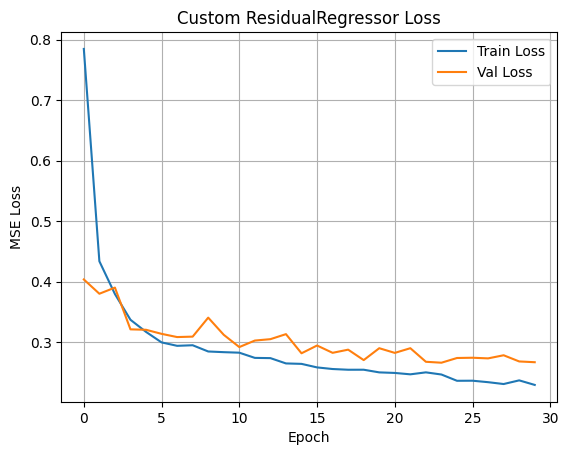

In [8]:
# Step 5: Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Custom ResidualRegressor Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()